# Создание файла для работы

In [41]:
import pandas as pd
import numpy as np

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv(r'C:\Users\AAA\Desktop\Диплом\data.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [44]:
df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,12/1/2010 9:37,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,12/1/2010 9:37,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,12/1/2010 9:37,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,12/1/2010 9:37,0.55,14688.0,United Kingdom


In [45]:
# Подсчет количества уникальных значений для указанных столбцов
columns_to_check = ['Description', 'CustomerID', 'Country', 'StockCode']

unique_counts = {column: df[column].nunique() for column in columns_to_check}

# Вывод результатов
for column, count in unique_counts.items():
    print(f"Столбец '{column}' содержит {count} уникальных значений.")


Столбец 'Description' содержит 4223 уникальных значений.
Столбец 'CustomerID' содержит 4372 уникальных значений.
Столбец 'Country' содержит 38 уникальных значений.
Столбец 'StockCode' содержит 4070 уникальных значений.


In [46]:
# Получение всех уникальных значений StockCode
unique_stock_codes = df['StockCode'].unique()

# Выбор первых 3668 уникальных значений
selected_stock_codes = unique_stock_codes[:3667]

# Фильтрация таблицы, оставляя только строки с выбранными StockCode
filtered_df = df[df['StockCode'].isin(selected_stock_codes)]

# Проверка результата
print(f"Количество уникальных StockCode после фильтрации: {filtered_df['StockCode'].nunique()}")


Количество уникальных StockCode после фильтрации: 3667


In [47]:
# Загрузка данных
tennis_store_data = pd.read_csv("tennis_store_data.csv")
df = pd.read_csv(r'C:\Users\AAA\Desktop\Диплом\data.csv', encoding='latin1')

# Приведение цен в tennis_store_data к числовому формату
tennis_store_data['Цена'] = tennis_store_data['Цена'].replace(r'[^\d.]', '', regex=True).astype(float)

# Уникальные StockCode в df
unique_stockcodes_df = df['StockCode'].unique()

# Оставляем только первые 3668 уникальных StockCode из df
if len(unique_stockcodes_df) < len(tennis_store_data):
    raise ValueError("В df недостаточно уникальных StockCode для сопоставления с tennis_store_data.")
    
selected_stockcodes = unique_stockcodes_df[:len(tennis_store_data)]

# Добавляем StockCode в tennis_store_data
tennis_store_data['StockCode'] = selected_stockcodes

# Создание словаря для замены
replacement_dict = tennis_store_data.set_index('StockCode')[['Название', 'Цена']].to_dict(orient='index')

# Удаляем строки в df с StockCode, которые отсутствуют в selected_stockcodes
df = df[df['StockCode'].isin(selected_stockcodes)]

# Замена данных в df
def replace_description_and_price(row):
    stock_info = replacement_dict.get(row['StockCode'])
    if stock_info:
        row['Description'] = stock_info['Название']
        row['UnitPrice'] = stock_info['Цена']
    return row

# Применение замены
df = df.apply(replace_description_and_price, axis=1)

# Сохранение результата
df.to_csv(r'C:\Users\AAA\Desktop\Диплом\updated_data.csv', index=False)

# Проверка результата
df.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,Теннисная ракетка Wilson Ultra Team V4.0,6,12/1/2010 8:26,20400.0,17850.0,United Kingdom
1,536365,71053,Теннисная ракетка Head Geo Speed (MM TRADE),6,12/1/2010 8:26,9140.0,17850.0,United Kingdom
2,536365,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,8,12/1/2010 8:26,31990.0,17850.0,United Kingdom
3,536365,84029G,Теннисная ракетка Wilson Six.One Lite 102,6,12/1/2010 8:26,24040.0,17850.0,United Kingdom
4,536365,84029E,Теннисная ракетка Yonex New EZONE 100L (285g) ...,6,12/1/2010 8:26,39950.0,17850.0,United Kingdom
5,536365,22752,Теннисная ракетка Yonex New EZONE 105 (275g),2,12/1/2010 8:26,38720.0,17850.0,United Kingdom
6,536365,21730,Теннисная ракетка Wilson Pro Staff Precision 100,6,12/1/2010 8:26,21590.0,17850.0,United Kingdom
7,536366,22633,Теннисная ракетка Wilson Triad Three,6,12/1/2010 8:28,38720.0,17850.0,United Kingdom
8,536366,22632,Теннисная ракетка Wilson Pro Staff Precision 103,6,12/1/2010 8:28,15160.0,17850.0,United Kingdom
9,536367,84879,Теннисная ракетка Tecnifibre T-Fight 305 Isofl...,32,12/1/2010 8:34,40760.0,13047.0,United Kingdom


In [48]:
# Подсчет количества уникальных значений для указанных столбцов
columns_to_check = ['Description', 'CustomerID', 'Country', 'StockCode']

unique_counts = {column: df[column].nunique() for column in columns_to_check}

# Вывод результатов
for column, count in unique_counts.items():
    print(f"Столбец '{column}' содержит {count} уникальных значений.")


Столбец 'Description' содержит 3465 уникальных значений.
Столбец 'CustomerID' содержит 4369 уникальных значений.
Столбец 'Country' содержит 38 уникальных значений.
Столбец 'StockCode' содержит 3668 уникальных значений.


In [49]:
# Округление значений в UnitPrice и приведение к целым числам
df['UnitPrice'] = df['UnitPrice'].round().astype(int)

# Проверка результата
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,Теннисная ракетка Wilson Ultra Team V4.0,6,12/1/2010 8:26,20400,17850.0,United Kingdom
1,536365,71053,Теннисная ракетка Head Geo Speed (MM TRADE),6,12/1/2010 8:26,9140,17850.0,United Kingdom
2,536365,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,8,12/1/2010 8:26,31990,17850.0,United Kingdom
3,536365,84029G,Теннисная ракетка Wilson Six.One Lite 102,6,12/1/2010 8:26,24040,17850.0,United Kingdom
4,536365,84029E,Теннисная ракетка Yonex New EZONE 100L (285g) ...,6,12/1/2010 8:26,39950,17850.0,United Kingdom
5,536365,22752,Теннисная ракетка Yonex New EZONE 105 (275g),2,12/1/2010 8:26,38720,17850.0,United Kingdom
6,536365,21730,Теннисная ракетка Wilson Pro Staff Precision 100,6,12/1/2010 8:26,21590,17850.0,United Kingdom
7,536366,22633,Теннисная ракетка Wilson Triad Three,6,12/1/2010 8:28,38720,17850.0,United Kingdom
8,536366,22632,Теннисная ракетка Wilson Pro Staff Precision 103,6,12/1/2010 8:28,15160,17850.0,United Kingdom
9,536367,84879,Теннисная ракетка Tecnifibre T-Fight 305 Isofl...,32,12/1/2010 8:34,40760,13047.0,United Kingdom


In [50]:
# Делим значения столбца Quantity на 3 и округляем в большую сторону
df['Quantity'] = np.ceil(df['Quantity'] / 3).astype(int)


# Проверка результата
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,Теннисная ракетка Wilson Ultra Team V4.0,2,12/1/2010 8:26,20400,17850.0,United Kingdom
1,536365,71053,Теннисная ракетка Head Geo Speed (MM TRADE),2,12/1/2010 8:26,9140,17850.0,United Kingdom
2,536365,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,3,12/1/2010 8:26,31990,17850.0,United Kingdom
3,536365,84029G,Теннисная ракетка Wilson Six.One Lite 102,2,12/1/2010 8:26,24040,17850.0,United Kingdom
4,536365,84029E,Теннисная ракетка Yonex New EZONE 100L (285g) ...,2,12/1/2010 8:26,39950,17850.0,United Kingdom
5,536365,22752,Теннисная ракетка Yonex New EZONE 105 (275g),1,12/1/2010 8:26,38720,17850.0,United Kingdom
6,536365,21730,Теннисная ракетка Wilson Pro Staff Precision 100,2,12/1/2010 8:26,21590,17850.0,United Kingdom
7,536366,22633,Теннисная ракетка Wilson Triad Three,2,12/1/2010 8:28,38720,17850.0,United Kingdom
8,536366,22632,Теннисная ракетка Wilson Pro Staff Precision 103,2,12/1/2010 8:28,15160,17850.0,United Kingdom
9,536367,84879,Теннисная ракетка Tecnifibre T-Fight 305 Isofl...,11,12/1/2010 8:34,40760,13047.0,United Kingdom


In [51]:
# Делим значения столбца UnitPrice на 8 и округляем в большую сторону
df['UnitPrice'] = np.ceil(df['UnitPrice'] // 8).astype(int)


# Проверка результата
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,Теннисная ракетка Wilson Ultra Team V4.0,2,12/1/2010 8:26,2550,17850.0,United Kingdom
1,536365,71053,Теннисная ракетка Head Geo Speed (MM TRADE),2,12/1/2010 8:26,1142,17850.0,United Kingdom
2,536365,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,3,12/1/2010 8:26,3998,17850.0,United Kingdom
3,536365,84029G,Теннисная ракетка Wilson Six.One Lite 102,2,12/1/2010 8:26,3005,17850.0,United Kingdom
4,536365,84029E,Теннисная ракетка Yonex New EZONE 100L (285g) ...,2,12/1/2010 8:26,4993,17850.0,United Kingdom


In [52]:
# Преобразуем столбец InvoiceDate в формат datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Извлекаем год и заменяем значения
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.replace(year=2023) if x.year == 2010 else x.replace(year=2024) if x.year == 2011 else x)

# Проверка результата
print(df[['InvoiceDate']].head(20))


           InvoiceDate
0  2023-12-01 08:26:00
1  2023-12-01 08:26:00
2  2023-12-01 08:26:00
3  2023-12-01 08:26:00
4  2023-12-01 08:26:00
5  2023-12-01 08:26:00
6  2023-12-01 08:26:00
7  2023-12-01 08:28:00
8  2023-12-01 08:28:00
9  2023-12-01 08:34:00
10 2023-12-01 08:34:00
11 2023-12-01 08:34:00
12 2023-12-01 08:34:00
13 2023-12-01 08:34:00
14 2023-12-01 08:34:00
15 2023-12-01 08:34:00
16 2023-12-01 08:34:00
17 2023-12-01 08:34:00
18 2023-12-01 08:34:00
19 2023-12-01 08:34:00


In [53]:
unique_country = df['Country'].unique()
print (unique_country)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [54]:
# Список стран и соответствующих городов
country_to_city_mapping = {
    'United Kingdom': 'Москва и МО',
    'France': 'Санкт-Петербург',
    'Australia': 'Новосибирск',
    'Netherlands': 'Екатеринбург',
    'Germany': 'Казань',
    'Norway': 'Нижний Новгород',
    'EIRE': 'Красноярск',
    'Switzerland': 'Челябинск',
    'Spain': 'Самара',
    'Poland': 'Уфа',
    'Portugal': 'Ростов-на-Дону',
    'Italy': 'Краснодар',
    'Belgium': 'Омск',
    'Lithuania': 'Воронеж',
    'Japan': 'Пермь',
    'Iceland': 'Волгоград',
    'Channel Islands': 'Тюмень',
    'Denmark': 'Сургут',
    'Cyprus': 'Новокузнецк',
    'Sweden': 'Ярославль',
    'Austria': 'Кемерово',
    'Israel': 'Калининград',
    'Finland': 'Калуга',
    'Bahrain': 'Набережные Челны',
    'Greece': 'Севастополь',
    'Hong Kong': 'Грозный',
    'Singapore': 'Мурманск',
    'Lebanon': 'Владивосток',
    'United Arab Emirates': 'Пермь',
    'Saudi Arabia': 'Иркутск',
    'Czech Republic': 'Томск',
    'Canada': 'Новокузнецк',
    'Unspecified': 'Калининград',
    'Brazil': 'Сургут',
    'USA': 'Новосибирск',
    'European Community': 'Калининград',
    'Malta': 'Санкт-Петербург',
    'RSA': 'Санкт-Петербург'
}

# Замена значений в столбце Country
df['Country'] = df['Country'].replace(country_to_city_mapping)

# Проверка результата
print(df)


       InvoiceNo StockCode                                        Description  \
0         536365    85123A           Теннисная ракетка Wilson Ultra Team V4.0   
1         536365     71053        Теннисная ракетка Head Geo Speed (MM TRADE)   
2         536365    84406B  Теннисная ракетка Wilson Blade 98 (18X20) V8.0...   
3         536365    84029G          Теннисная ракетка Wilson Six.One Lite 102   
4         536365    84029E  Теннисная ракетка Yonex New EZONE 100L (285g) ...   
...          ...       ...                                                ...   
541904    581587     22613  Мужские теннисные шорты Nike Court Dri-Fit Vic...   
541905    581587     22899           Теннисная ракетка Wilson Hyper Fusion XL   
541906    581587     23254  Женские Кроссовки теннисные Diadora B.Icon 2 W...   
541907    581587     23255  Мужские кроссовки теннисные Asics Solution Spe...   
541908    581587     22138  Теннисная юбка Head Club 3/4 Tights Skort - не...   

        Quantity         In

In [55]:
# Переименование столбцов
df.rename(columns={
    "InvoiceNo": "ID заказа",
    "StockCode": "Артикул",
    "Description": "Название",
    "Quantity": "Количество",
    "InvoiceDate": "Дата",
    "UnitPrice": "Цена",
    "CustomerID": "ID клиента",
    "Country": "Регион"
}, inplace=True)

# Проверка результатов
df.head(5)

,ID заказа,Артикул,Название,Количество,Дата,Цена,ID клиента,Регион
0,536365,85123A,Теннисная ракетка Wilson Ultra Team V4.0,2,2023-12-01 08:26:00,2550,17850.0,Москва и МО
1,536365,71053,Теннисная ракетка Head Geo Speed (MM TRADE),2,2023-12-01 08:26:00,1142,17850.0,Москва и МО
2,536365,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,3,2023-12-01 08:26:00,3998,17850.0,Москва и МО
3,536365,84029G,Теннисная ракетка Wilson Six.One Lite 102,2,2023-12-01 08:26:00,3005,17850.0,Москва и МО
4,536365,84029E,Теннисная ракетка Yonex New EZONE 100L (285g) ...,2,2023-12-01 08:26:00,4993,17850.0,Москва и МО


In [56]:
quantity_description = df['Количество'].describe()
print("Основная информация о столбце 'Количество':")
print(quantity_description)

Основная информация о столбце 'Количество':
count    511639.000000
mean          3.545209
std          52.340148
min      -24738.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       24739.000000
Name: Количество, dtype: float64


In [83]:
# Функция для разделения заказов
"""
    Только после обработки ошибок и выбросов
    
    """
def split_orders(df):
    new_rows = []
    customer_id_counter = 0.1  # Начинаем с 0.1 для дробной части
    for index, row in df.iterrows():
        if row['Количество'] > 1:
            # Разделяем заказ на несколько строк
            for i in range(row['Количество']):
                new_row = row.copy()
                new_row['Количество'] = 1
                # Создаем новый номер счета, добавляя суффикс
                new_row['ID заказа'] = f"{row['ID заказа']}_{i+1}"
                # Назначаем новый ID клиента с дробной частью
                new_row['ID клиента'] = row['ID клиента'] + customer_id_counter
                customer_id_counter += 0.1  # Увеличиваем дробную часть
                new_rows.append(new_row)
        else:
            # Если Количество = 1, оставляем строку без изменений
            new_rows.append(row)
    return pd.DataFrame(new_rows)

# Разделяем данные на две части
half_size = len(df) // 2  # Определяем половину данных
data_to_split = df.iloc[:half_size]  # Первая половина данных
data_untouched = df.iloc[half_size:]  # Вторая половина данных

# Применяем функцию только к первой половине данных
data_to_split = split_orders(data_to_split)

# Объединяем обратно
df = pd.concat([data_to_split, data_untouched], ignore_index=True)

# Проверка результатов
df.head(20)

,ID заказа,Артикул,Название,Количество,Дата,Цена,ID клиента,Регион
0,536365_1,85123A,Теннисная ракетка Wilson Ultra Team V4.0,1,2023-12-01 08:26:00,2040,17850.1,Москва и МО
1,536365_2,85123A,Теннисная ракетка Wilson Ultra Team V4.0,1,2023-12-01 08:26:00,2040,17850.2,Москва и МО
2,536365_1,71053,Теннисная ракетка Head Geo Speed (MM TRADE),1,2023-12-01 08:26:00,914,17850.3,Москва и МО
3,536365_2,71053,Теннисная ракетка Head Geo Speed (MM TRADE),1,2023-12-01 08:26:00,914,17850.4,Москва и МО
4,536365_1,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,1,2023-12-01 08:26:00,3199,17850.5,Москва и МО
5,536365_2,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,1,2023-12-01 08:26:00,3199,17850.6,Москва и МО
6,536365_3,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,1,2023-12-01 08:26:00,3199,17850.7,Москва и МО
7,536365_1,84029G,Теннисная ракетка Wilson Six.One Lite 102,1,2023-12-01 08:26:00,2404,17850.8,Москва и МО
8,536365_2,84029G,Теннисная ракетка Wilson Six.One Lite 102,1,2023-12-01 08:26:00,2404,17850.9,Москва и МО
9,536365_1,84029E,Теннисная ракетка Yonex New EZONE 100L (285g) ...,1,2023-12-01 08:26:00,3995,17851.0,Москва и МО


In [47]:
df.tail(20)

,ID заказа,Артикул,Название,Количество,Дата,Цена,ID клиента,Регион
603874,581585,22466,Теннисная ракетка Prince Twist Power X 105 290...,4,2024-12-09 12:31:00,4280,15804.0,Москва и МО
603875,581586,22061,Виброгаситель Pro's Pro Adler 3P,3,2024-12-09 12:49:00,108,13113.0,Москва и МО
603876,581586,23275,детские Кроссовки теннисные Babolat Propulse A...,8,2024-12-09 12:49:00,1100,13113.0,Москва и МО
603877,581586,21217,Теннисные струны Tourna Quasi-Gut (12 m) - нат...,8,2024-12-09 12:49:00,332,13113.0,Москва и МО
603878,581586,20685,Теннисная ракетка Head Boom MP L Alternate 2024,4,2024-12-09 12:49:00,3546,13113.0,Москва и МО
603879,581587,22631,Теннисная ракетка Head Gravity Pro,4,2024-12-09 12:50:00,3519,12680.0,Санкт-Петербург
603880,581587,22556,Теннисная ракетка Tecnifibre Tempo 285 + Струн...,4,2024-12-09 12:50:00,3668,12680.0,Санкт-Петербург
603881,581587,22555,Сумка теннисная Babolat Pure Aero RHX12 - серый,4,2024-12-09 12:50:00,1958,12680.0,Санкт-Петербург
603882,581587,22728,Теннисная ракетка Tecnifibre TF-X1 275,2,2024-12-09 12:50:00,3264,12680.0,Санкт-Петербург
603883,581587,22727,Теннисная ракетка Wilson Clash 98 V2.0,2,2024-12-09 12:50:00,2519,12680.0,Санкт-Петербург


In [52]:
# Функция для разделения заказов с большим количеством позиций
"""
    Только после обработки ошибок и выбросов
    
    """
def split_large_orders(df, max_items=5):
    new_rows = []
    
    # Группируем по ID заказа и ID клиента
    grouped = df.groupby(['ID заказа', 'ID клиента'])
    
    for (invoice_no, customer_id), group in grouped:
        if len(group) > max_items:
            # Если позиций больше max_items, разделяем заказ
            num_splits = (len(group) // max_items + 1)
            for i in range(num_splits):
                # Берем часть позиций для нового заказа
                start_idx = i * max_items
                end_idx = start_idx + max_items
                split_group = group.iloc[start_idx:end_idx].copy()
                
                # Создаем новый номер заказа
                split_group['ID заказа'] = f"{invoice_no}_split_{i+1}"
                
                # Создаем новый ID клиента
                split_group['ID клиента'] = f"{customer_id}_split_{i+1}"
                
                new_rows.append(split_group)
        else:
            # Если позиций меньше или равно max_items, оставляем без изменений
            new_rows.append(group)
    
    # Объединяем все строки в один DataFrame
    return pd.concat(new_rows, ignore_index=True)

# Разделяем данные на две части
half_size = len(df) // 2  # Определяем половину данных
data_to_split = df.iloc[:half_size]  # Первая половина данных
data_untouched = df.iloc[half_size:]  # Вторая половина данных

# Применяем функцию только к первой половине данных
data_to_split = split_large_orders(data_to_split, max_items=5)

# Объединяем обратно
df = pd.concat([data_to_split, data_untouched], ignore_index=True)

# Выводим результат
print(df.head(20))

         ID заказа Артикул                                           Название  \
0   536365_split_1  85123A           Теннисная ракетка Wilson Ultra Team V4.0   
1   536365_split_1   71053        Теннисная ракетка Head Geo Speed (MM TRADE)   
2   536365_split_1  84406B  Теннисная ракетка Wilson Blade 98 (18X20) V8.0...   
3   536365_split_1  84029G          Теннисная ракетка Wilson Six.One Lite 102   
4   536365_split_1  84029E  Теннисная ракетка Yonex New EZONE 100L (285g) ...   
5   536365_split_2   22752       Теннисная ракетка Yonex New EZONE 105 (275g)   
6   536365_split_2   21730   Теннисная ракетка Wilson Pro Staff Precision 100   
7           536366   22633               Теннисная ракетка Wilson Triad Three   
8           536366   22632   Теннисная ракетка Wilson Pro Staff Precision 103   
9   536367_split_1   22745  Теннисная ракетка Wilson Ultra 100L V4.0 + Стр...   
10  536367_split_1   22748  Теннисная ракетка Wilson Pro Staff 97L V14 + С...   
11  536367_split_1   22749  

In [17]:
# Сохранение в CSV файл
df.to_csv("tennis_store_sales(2023-2024).csv", index=False, encoding="utf-8")

# Анализ данных

In [58]:
mi = df['Дата'].min()
ma = df['Дата'].max()

print (mi, ma)

2023-12-01 08:26:00 2024-12-09 12:50:00


In [19]:
df = pd.read_csv(r'C:\Users\AAA\Desktop\Jupyter_Tableau\tennis_store_sales(2023-2024).csv', encoding='utf-8')

In [59]:
# Удаление строк с null значениями в столбце "ID клиента"
df.dropna(subset=["ID клиента"], inplace=True)


In [60]:
# Подсчёт количества дубликатов
duplicates_count = df.duplicated().sum()
print(f"Количество дублирующихся строк: {duplicates_count}")


Количество дублирующихся строк: 7487


In [61]:
# Удаление дублирующихся строк
df.drop_duplicates(inplace=True)

In [62]:
# Фильтрация строк, где "ID заказа" содержит что-либо, кроме цифр
non_numeric_ids = df[~df['ID заказа'].astype(str).str.match(r'^\d+$')]

# Вывод строк
non_numeric_ids.head(20)

,ID заказа,Артикул,Название,Количество,Дата,Цена,ID клиента,Регион
141,C536379,D,Теннисная ракетка Prince Textreme 2.5 O3 Legac...,0,2023-12-01 09:41:00,3948,14527.0,Москва и МО
154,C536383,35004C,Теннисная ракетка Dunlop CX 200 Tour 16x19,0,2023-12-01 09:49:00,4585,15311.0,Москва и МО
235,C536391,22556,Теннисная ракетка Tecnifibre Tempo 285 + Струн...,-4,2023-12-01 10:24:00,4585,17548.0,Москва и МО
236,C536391,21984,Теннисная ракетка Tecnifibre Tempo 270 + Струн...,-8,2023-12-01 10:24:00,2805,17548.0,Москва и МО
237,C536391,21983,Теннисная ракетка Tecnifibre Tempo 255,-8,2023-12-01 10:24:00,4075,17548.0,Москва и МО
238,C536391,21980,Теннисная ракетка Wilson Minions Clash 100 V2,-8,2023-12-01 10:24:00,3598,17548.0,Москва и МО
239,C536391,21484,Теннисная ракетка Tecnifibre TF-X1 285,-4,2023-12-01 10:24:00,4080,17548.0,Москва и МО
240,C536391,22557,Ракетка детская Babolat Drive Jr 25,-4,2023-12-01 10:24:00,1491,17548.0,Москва и МО
241,C536391,22553,"Ракетка детская Prince 20 Pink 19 (19"")",-8,2023-12-01 10:24:00,718,17548.0,Москва и МО
939,C536506,22960,Теннисная ракетка Tecnifibre T-Fight 280 Isofl...,-2,2023-12-01 12:38:00,4942,17897.0,Москва и МО


In [63]:
# проверяем есть ли в таблице данные противоположные отмененным, например C536814 и 536814

df2 = df.copy()

# Удаляем букву 'C' в начале значений столбца 'ID заказа'
df2['ID заказа'] = df2['ID заказа'].astype(str).str.lstrip('C')

# Преобразуем 'ID заказа' к числовому формату, если это возможно
df2['ID заказа'] = pd.to_numeric(df2['ID заказа'], errors='coerce')

# Проверяем на дубликаты
duplicates = df2.duplicated().sum()

print(f"Количество дублирующихся строк: {duplicates}")

Количество дублирующихся строк: 0


In [64]:
# далее работаем без отмененных заказов
# Удаление найденных строк из исходного DataFrame
df = df.drop(non_numeric_ids.index)

In [65]:
quantity_description = df['Количество'].describe()
print("Основная информация о столбце 'Количество':")
print(quantity_description)

Основная информация о столбце 'Количество':
count    365660.000000
mean          4.685251
std          43.988382
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max       24739.000000
Name: Количество, dtype: float64


In [66]:
# Преобразование столбца 'Дата' в datetime
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')


In [67]:
# Проверка пустых дат
invalid_dates = df[df['Дата'].isna()]
print("Некорректные даты:\n", invalid_dates)

Некорректные даты:
 Empty DataFrame
Columns: [ID заказа, Артикул, Название, Количество, Дата, Цена, ID клиента, Регион]
Index: []


In [68]:
quantity_description = df['Цена'].describe()
print("Основная информация о столбце 'Цена':")
print(quantity_description)


Основная информация о столбце 'Цена':
count    365660.000000
mean       2168.473325
std        1631.712760
min           0.000000
25%         725.000000
50%        1928.000000
75%        3248.000000
max       10195.000000
Name: Цена, dtype: float64


In [69]:
# Проверка строк, где 'Цена' равна 0
price_zero_rows = df[df['Цена'] == 0]
price_zero_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 9855 to 539854
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID заказа   510 non-null    object        
 1   Артикул     510 non-null    object        
 2   Название    510 non-null    object        
 3   Количество  510 non-null    int32         
 4   Дата        510 non-null    datetime64[ns]
 5   Цена        510 non-null    int32         
 6   ID клиента  510 non-null    float64       
 7   Регион      510 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 31.9+ KB


In [70]:
# Удаление строк, где 'Цена' равна 0
df = df[df['Цена'] != 0]

In [71]:
# Проверка регионов

ur = df['Регион'].unique()

print(ur)

['Москва и МО' 'Санкт-Петербург' 'Новосибирск' 'Екатеринбург' 'Казань'
 'Нижний Новгород' 'Красноярск' 'Челябинск' 'Самара' 'Уфа'
 'Ростов-на-Дону' 'Краснодар' 'Омск' 'Воронеж' 'Пермь' 'Волгоград'
 'Тюмень' 'Сургут' 'Новокузнецк' 'Ярославль' 'Калуга' 'Кемерово'
 'Севастополь' 'Мурманск' 'Владивосток' 'Калининград' 'Иркутск' 'Томск'
 'Набережные Челны']


## Проверим данные на выбросы

In [72]:
Q1 = df["Количество"].quantile(0.25)  # Первый квартиль (25%)
Q3 = df["Количество"].quantile(0.75)  # Третий квартиль (75%)
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация данных, оставляем только значения в допустимом диапазоне
df = df[(df["Количество"] >= lower_bound) & (df["Количество"] <= upper_bound)]


In [73]:
quantity_description = df['Количество'].describe()
print("Основная информация о столбце 'Количество':")
print(quantity_description)

Основная информация о столбце 'Количество':
count    336154.000000
mean          2.605690
std           2.002702
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           8.000000
Name: Количество, dtype: float64


In [74]:
# # Функция напрвлена на обработку файла, не имеет отношения к анализу
# # Функция для разделения заказов 
# def split_orders(df):
#     new_rows = []
#     customer_id_counter = 0.1  # Начинаем с 0.1 для дробной части
#     for index, row in df.iterrows():
#         if row['Количество'] > 1:
#             # Разделяем заказ на несколько строк
#             for i in range(row['Количество']):
#                 new_row = row.copy()
#                 new_row['Количество'] = 1
#                 # Создаем новый номер счета, добавляя суффикс
#                 new_row['ID заказа'] = f"{row['ID заказа']}_{i+1}"
#                 # Назначаем новый ID клиента с дробной частью
#                 new_row['ID клиента'] = row['ID клиента'] + customer_id_counter
#                 customer_id_counter += 0.1  # Увеличиваем дробную часть
#                 new_rows.append(new_row)
#         else:
#             # Если Количество = 1, оставляем строку без изменений
#             new_rows.append(row)
#     return pd.DataFrame(new_rows)

# # Разделяем данные на две части
# half_size = len(df) // 2  # Определяем половину данных
# data_to_split = df.iloc[:half_size]  # Первая половина данных
# data_untouched = df.iloc[half_size:]  # Вторая половина данных

# # Применяем функцию только к первой половине данных
# data_to_split = split_orders(data_to_split)

# # Объединяем обратно
# df = pd.concat([data_to_split, data_untouched], ignore_index=True)

# # Проверка результатов
# df.head(20)

,ID заказа,Артикул,Название,Количество,Дата,Цена,ID клиента,Регион
0,536365_1,85123A,Теннисная ракетка Wilson Ultra Team V4.0,1,2023-12-01 08:26:00,2550,17850.1,Москва и МО
1,536365_2,85123A,Теннисная ракетка Wilson Ultra Team V4.0,1,2023-12-01 08:26:00,2550,17850.2,Москва и МО
2,536365_1,71053,Теннисная ракетка Head Geo Speed (MM TRADE),1,2023-12-01 08:26:00,1142,17850.3,Москва и МО
3,536365_2,71053,Теннисная ракетка Head Geo Speed (MM TRADE),1,2023-12-01 08:26:00,1142,17850.4,Москва и МО
4,536365_1,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,1,2023-12-01 08:26:00,3998,17850.5,Москва и МО
5,536365_2,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,1,2023-12-01 08:26:00,3998,17850.6,Москва и МО
6,536365_3,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,1,2023-12-01 08:26:00,3998,17850.7,Москва и МО
7,536365_1,84029G,Теннисная ракетка Wilson Six.One Lite 102,1,2023-12-01 08:26:00,3005,17850.8,Москва и МО
8,536365_2,84029G,Теннисная ракетка Wilson Six.One Lite 102,1,2023-12-01 08:26:00,3005,17850.9,Москва и МО
9,536365_1,84029E,Теннисная ракетка Yonex New EZONE 100L (285g) ...,1,2023-12-01 08:26:00,4993,17851.0,Москва и МО


In [75]:
quantity_description = df['Количество'].describe()
print("Основная информация о столбце 'Количество':")
print(quantity_description)

Основная информация о столбце 'Количество':
count    603894.000000
mean          1.450442
std           1.291988
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: Количество, dtype: float64


In [76]:
# Функция напрвлена на обработку файла, не имеет отношения к анализу
# Функция для разделения заказов с большим количеством позиций
# def split_large_orders(df, max_items=5):
#     new_rows = []
#     # Группируем по ID заказа и ID клиента
#     grouped = df.groupby(['ID заказа', 'ID клиента'])
    
#     for (invoice_no, customer_id), group in grouped:
#         if len(group) > max_items:
#             # Если позиций больше max_items, разделяем заказ
#             num_splits = (len(group) // max_items) + 1
#             for i in range(num_splits):
#                 # Берем часть позиций для нового заказа
#                 start_idx = i * max_items
#                 end_idx = start_idx + max_items
#                 split_group = group.iloc[start_idx:end_idx].copy()
#                 # Создаем новый номер счета
#                 split_group['ID заказа'] = f"{invoice_no}_{i+1}"
#                 # Назначаем нового клиента с дробной частью
#                 split_group['ID клиента'] = customer_id + (i + 1) * 0.1
#                 new_rows.append(split_group)
#         else:
#             # Если позиций меньше или равно max_items, оставляем без изменений
#             new_rows.append(group)
    
#     # Объединяем все строки в один DataFrame
#     return pd.concat(new_rows, ignore_index=True)

# # Разделяем данные на две части
# half_size = len(df) // 2  # Определяем половину данных
# data_to_split = df.iloc[:half_size]  # Первая половина данных
# data_untouched = df.iloc[half_size:]  # Вторая половина данных

# # Применяем функцию только к первой половине данных
# data_to_split = split_large_orders(data_to_split, max_items=5)

# # Объединяем обратно
# df = pd.concat([data_to_split, data_untouched], ignore_index=True)

# # Выводим результат
# df.head(20)

,ID заказа,Артикул,Название,Количество,Дата,Цена,ID клиента,Регион
0,536365,22752,Теннисная ракетка Yonex New EZONE 105 (275g),1,2023-12-01 08:26:00,4840,17850.0,Москва и МО
1,536365_1,85123A,Теннисная ракетка Wilson Ultra Team V4.0,1,2023-12-01 08:26:00,2550,17850.1,Москва и МО
2,536365_1,71053,Теннисная ракетка Head Geo Speed (MM TRADE),1,2023-12-01 08:26:00,1142,17850.3,Москва и МО
3,536365_1,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,1,2023-12-01 08:26:00,3998,17850.5,Москва и МО
4,536365_1,84029G,Теннисная ракетка Wilson Six.One Lite 102,1,2023-12-01 08:26:00,3005,17850.8,Москва и МО
5,536365_1,84029E,Теннисная ракетка Yonex New EZONE 100L (285g) ...,1,2023-12-01 08:26:00,4993,17851.0,Москва и МО
6,536365_1,21730,Теннисная ракетка Wilson Pro Staff Precision 100,1,2023-12-01 08:26:00,2698,17851.2,Москва и МО
7,536365_2,85123A,Теннисная ракетка Wilson Ultra Team V4.0,1,2023-12-01 08:26:00,2550,17850.2,Москва и МО
8,536365_2,71053,Теннисная ракетка Head Geo Speed (MM TRADE),1,2023-12-01 08:26:00,1142,17850.4,Москва и МО
9,536365_2,84406B,Теннисная ракетка Wilson Blade 98 (18X20) V8.0...,1,2023-12-01 08:26:00,3998,17850.6,Москва и МО


In [77]:
quantity_description = df['Количество'].describe()
print("Основная информация о столбце 'Количество':")
print(quantity_description)

Основная информация о столбце 'Количество':
count    603894.000000
mean          1.450442
std           1.291988
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: Количество, dtype: float64


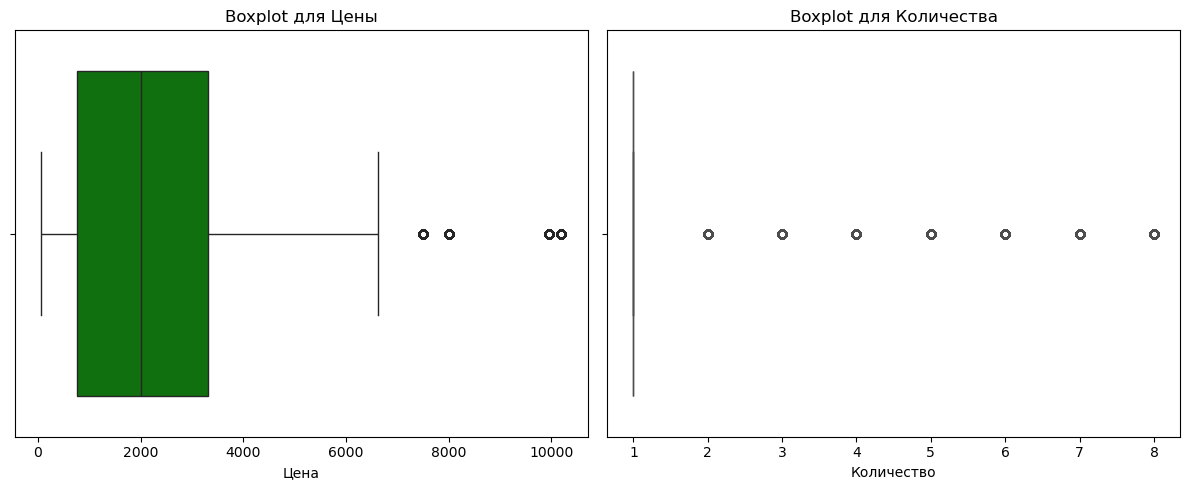

In [78]:
# Установка размера графиков
plt.figure(figsize=(12, 5))

# Boxplot для "Количество"
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Количество'], color='blue')
plt.title('Boxplot для Количества')
plt.xlabel('Количество')

# Boxplot для "Цена"
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Цена'], color='green')
plt.title('Boxplot для Цены')
plt.xlabel('Цена')

plt.tight_layout()
plt.show()

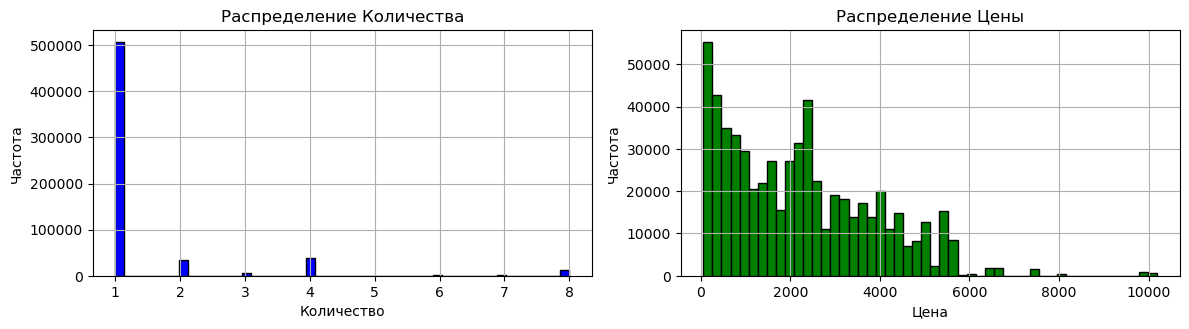

In [79]:
# Настройка размеров графиков
plt.figure(figsize=(12, 6))

# Гистограмма для 'Количество'
plt.subplot(2, 2, 1)
df['Количество'].hist(bins=50, color='blue', edgecolor='black')
plt.title('Распределение Количества')
plt.xlabel('Количество')
plt.ylabel('Частота')

# Гистограмма для 'Цена'
plt.subplot(2, 2, 2)
df['Цена'].hist(bins=50, color='green', edgecolor='black')
plt.title('Распределение Цены')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Сегментация

In [81]:
df3 = df.copy()

In [82]:
# Сохраняем файлы

df2.to_csv(r'C:\Users\AAA\Desktop\Диплом\tennis-pro_sale1-1.csv', index=False)


In [83]:
df3.to_csv(r'C:\Users\AAA\Desktop\Диплом\tennis-pro_sale2-1.csv', index=False)

In [84]:
# Добавим новые столбци
df3['Сумма заказов (руб.)'] = df3['Цена']*df3['Количество']

# Выполним агрегацию в столбцах
customer_df3 = df3.groupby('ID клиента').aggregate({'ID заказа':'nunique','Название':'nunique','Сумма заказов (руб.)':'sum','Количество':'sum'}).reset_index()

# Переименуем столбцы
customer_df3 = customer_df3.rename(columns={'ID заказа':'Количество заказов','Название':'Количество артикулов','Количество':'Всего товаров'})
customer_df3['Средний чек'] = round(customer_df3['Сумма заказов (руб.)']/customer_df3['Количество заказов'],2)
customer_df3['Среднее количество товара в заказе'] = round(customer_df3['Всего товаров']/customer_df3['Количество заказов'],2)

customer_df3.tail(30)

,ID клиента,Количество заказов,Количество артикулов,Сумма заказов (руб.),Всего товаров,Средний чек,Среднее количество товара в заказе
374462,54389.7,1,1,991,1,991.0,1.0
374463,54389.8,1,1,991,1,991.0,1.0
374464,54389.9,1,1,991,1,991.0,1.0
374465,54390.0,1,1,991,1,991.0,1.0
374466,54390.1,1,1,991,1,991.0,1.0
374467,54390.2,1,1,991,1,991.0,1.0
374468,54390.3,1,1,7497,1,7497.0,1.0
374469,54390.4,1,1,7497,1,7497.0,1.0
374470,54390.5,1,1,7497,1,7497.0,1.0
374471,54390.6,1,1,7497,1,7497.0,1.0


In [85]:
customer_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374492 entries, 0 to 374491
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID клиента                          374492 non-null  float64
 1   Количество заказов                  374492 non-null  int64  
 2   Количество артикулов                374492 non-null  int64  
 3   Сумма заказов (руб.)                374492 non-null  int64  
 4   Всего товаров                       374492 non-null  int64  
 5   Средний чек                         374492 non-null  float64
 6   Среднее количество товара в заказе  374492 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 20.0 MB


In [86]:
df3['Дата'] = pd.to_datetime(df3['Дата'])

# Расчёты
timerange_df3 = df3.groupby('ID клиента').agg(
    min_date=('Дата', 'min'),
    max_date=('Дата', 'max')).reset_index()

timerange_df3['LifeTime(мес.)'] = ((timerange_df3['max_date'].dt.year - timerange_df3['min_date'].dt.year) * 12 + 
                                  (timerange_df3['max_date'].dt.month - timerange_df3['min_date'].dt.month))+1
# Последняя дата покупки
overall_max_date = df3['Дата'].max()

timerange_df3['Мес. с последней покупки'] = ((overall_max_date.year - timerange_df3['max_date'].dt.year) * 12 + 
                                  (overall_max_date.month - timerange_df3['max_date'].dt.month))+1

# Соеденяю датасеты
customer_df3 = customer_df3.merge(timerange_df3[['ID клиента','LifeTime(мес.)','Мес. с последней покупки']],how='left',on='ID клиента')
customer_df3['Продажи в мес.'] = round(customer_df3['Сумма заказов (руб.)']/customer_df3['LifeTime(мес.)'],2)

customer_df3.head()

,ID клиента,Количество заказов,Количество артикулов,Сумма заказов (руб.),Всего товаров,Средний чек,Среднее количество товара в заказе,LifeTime(мес.),Мес. с последней покупки,Продажи в мес.
0,12347.0,7,48,683955,288,97707.86,41.14,13,1,52611.92
1,12348.0,3,1,6315,3,2105.00,1.00,9,4,701.67
2,12349.0,1,59,312099,153,312099.00,153.00,1,2,312099.00
3,12350.0,1,1,2105,1,2105.00,1.00,1,11,2105.00
4,12352.0,7,38,243764,101,34823.43,14.43,9,2,27084.89


In [87]:
# Добавляем столбцы для определения будних и выходных
df3['День недели'] = df3['Дата'].dt.weekday  # 0 = Понедельник, 6 = Воскресенье
df3['Выходной'] = df3['День недели'] >= 5  # True для субботы и воскресенья

# Предварительные маски для ускорения
is_weekday = ~df3['Выходной']  # Маска будних дней
is_weekend = df3['Выходной']   # Маска выходных

# Группировка и подсчет уникальных заказов в будни и выходные
weekend_df3 = df3.groupby('ID клиента').agg(
    Уникальные_заказы_в_будни=('ID заказа', lambda x: x[is_weekday.loc[x.index]].nunique()),
    Уникальные_заказы_в_выходные=('ID заказа', lambda x: x[is_weekend.loc[x.index]].nunique())
).reset_index()

# Объединяем с таблицей customer_df3
customer_df3 = customer_df3.merge(weekend_df3, how='left', on='ID клиента')

# Рассчитываем долю заказов, сделанных в выходные
customer_df3['Доля заказов в выходные'] = (
    customer_df3['Уникальные_заказы_в_выходные'] / customer_df3['Количество заказов']
)

# Вывод первых строк таблицы
customer_df3.head()


,ID клиента,Количество заказов,Количество артикулов,Сумма заказов (руб.),Всего товаров,Средний чек,Среднее количество товара в заказе,LifeTime(мес.),Мес. с последней покупки,Продажи в мес.,Уникальные_заказы_в_будни,Уникальные_заказы_в_выходные,Доля заказов в выходные
0,12347.0,7,48,683955,288,97707.86,41.14,13,1,52611.92,4,3,0.428571
1,12348.0,3,1,6315,3,2105.00,1.00,9,4,701.67,3,0,0.000000
2,12349.0,1,59,312099,153,312099.00,153.00,1,2,312099.00,1,0,0.000000
3,12350.0,1,1,2105,1,2105.00,1.00,1,11,2105.00,1,0,0.000000
4,12352.0,7,38,243764,101,34823.43,14.43,9,2,27084.89,4,3,0.428571


In [88]:
# Сократим кол-во столбцов для работы
list_of_columns = ['ID клиента','Количество заказов','Количество артикулов',
                   'Средний чек','LifeTime(мес.)','Продажи в мес.', 'Сумма заказов (руб.)',
                   'Мес. с последней покупки','Доля заказов в выходные']

customer_df3 = customer_df3[list_of_columns]

# Отфильтруем датасет, чтобы оставить только числовые столбцы
numeric_df3 = customer_df3.select_dtypes(include=['number'])


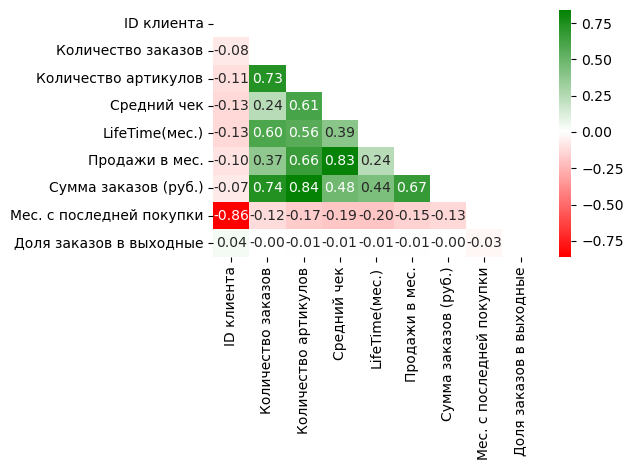

In [89]:
from matplotlib.colors import LinearSegmentedColormap

# Создаем кастомную цветовую карту
colors = ["red", "white", "green"]  # Красный для -1, белый для 0, зеленый для 1
cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Рассчитываем матрицу корреляции методом Пирсона, округляем до 2 знаков
pearson_corr = numeric_df3.corr(method='pearson').round(2)

# Создаём маску для скрытия верхнего (симетричного) треугольника матрицы
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Строим тепловую карту с кастомной цветовой картой
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap=cmap_custom, center=0, mask=mask, cbar=True)

# Настроим отображение графика
plt.tight_layout()
plt.show()

## K-mean кластеризация

Масштабирование данных перед применением K-means кластеризации.
Масштабирование необходимо, чтобы привести все признаки к одинаковому масштабу, так как K-means чувствителен к разным диапазонам значений в данных. Если признаки имеют разные масштабы (например, возраст в диапазоне 0–100 и доход в диапазоне 0–1 000 000), то признаки с большими значениями могут доминировать при вычислении расстояний, что исказит результаты кластеризации.

In [90]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Стандартизация и нормализация
scaler = StandardScaler()

columns_to_exclude = ['ID клиента']
columns_to_scale = customer_df3.columns.difference(columns_to_exclude)
customer_data_scaled = customer_df3.copy()
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])
customer_data_scaled.head()

,ID клиента,Количество заказов,Количество артикулов,Средний чек,LifeTime(мес.),Продажи в мес.,Сумма заказов (руб.),Мес. с последней покупки,Доля заказов в выходные
0,12347.0,8.853291,6.555754,8.084328,21.370968,3.455710,9.790136,-3.750819,0.070594
1,12348.0,2.915823,-0.066924,-0.088285,14.219255,-0.167148,0.016410,-2.427007,-0.809112
2,12349.0,-0.052911,8.105743,26.411559,-0.084170,21.565519,4.426789,-3.309548,-0.809112
3,12350.0,-0.052911,-0.066924,-0.088285,-0.084170,-0.069208,-0.044311,0.661888,-0.809112
4,12352.0,8.853291,5.146674,2.708651,14.219255,1.674158,3.441181,-3.309548,0.070594


In [19]:
!pip install yellowbrick

In [91]:
print(customer_data_scaled.dtypes)


ID клиента                  float64
Количество заказов          float64
Количество артикулов        float64
Средний чек                 float64
LifeTime(мес.)              float64
Продажи в мес.              float64
Сумма заказов (руб.)        float64
Мес. с последней покупки    float64
Доля заказов в выходные     float64
dtype: object


In [92]:
customer_data_scaled_2 = customer_data_scaled.copy()


In [93]:
customer_data_scaled_2 = customer_data_scaled.drop(columns=['ID клиента'])

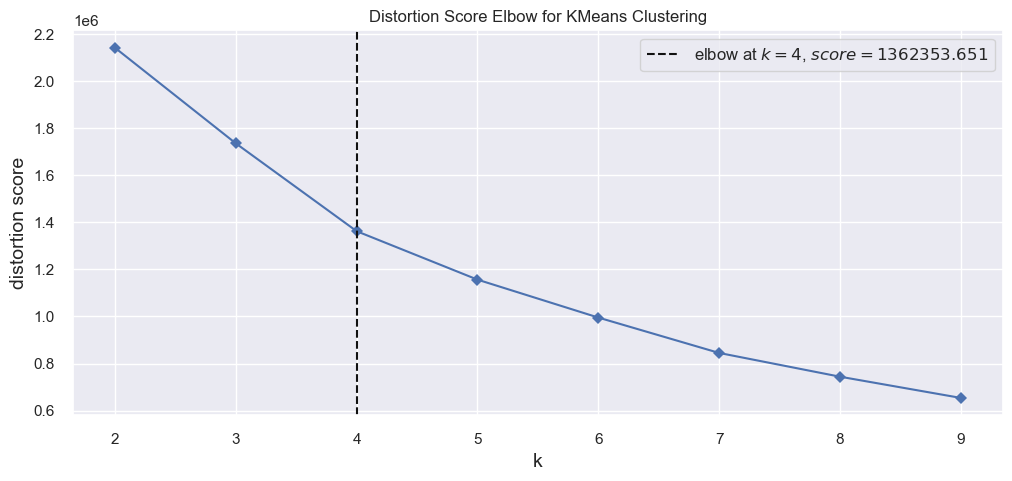

In [112]:
# Выбор оптимального числа кластеров для алгоритма KMeans с помощью методо локтя.

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


sns.set(style='darkgrid')

# Возьмем стандартные параметры модели
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Инициализация визуализатора
fig, ax = plt.subplots(figsize=(12, 5))

# Обучение визуализатора
visualizer = KElbowVisualizer(km, k=(2, 10), timings=False, ax=ax)

# Настройка заголовка и подписей осей на русском языке
ax.set_title('Метод "локтя" для выбора числа кластеров', fontsize=16)
ax.set_xlabel('Число кластеров (k)', fontsize=14)
ax.set_ylabel('Искажение (Distortion)', fontsize=14)

visualizer.fit(customer_data_scaled_2)
visualizer.show();


In [113]:
# Оставим 4 кластера
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
customer_df3['Кластер'] = kmeans.fit_predict(customer_data_scaled_2)

customer_df3.head()

,ID клиента,Количество заказов,Количество артикулов,Средний чек,LifeTime(мес.),Продажи в мес.,Сумма заказов (руб.),Мес. с последней покупки,Доля заказов в выходные,Кластер
0,12347.0,7,48,97707.86,13,52611.92,683955,1,0.428571,2
1,12348.0,3,1,2105.00,9,701.67,6315,4,0.000000,1
2,12349.0,1,59,312099.00,1,312099.00,312099,2,0.000000,2
3,12350.0,1,1,2105.00,1,2105.00,2105,11,0.000000,1
4,12352.0,7,38,34823.43,9,27084.89,243764,2,0.428571,2


In [117]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Рассчитываем силуэтный коэффициент (Silhouette Score)
silhouette_avg = silhouette_score(customer_data_scaled_2, customer_df3['Кластер'])
print(f"Силуэтный коэффициент: {silhouette_avg:.3f}")

# Рассчитываем индекс Калински-Харабаша (Calinski-Harabasz Score)
calinski_harabasz = calinski_harabasz_score(customer_data_scaled_2, customer_df3['Кластер'])
print(f"Индекс Калински-Харабаша: {calinski_harabasz:.3f}")

# Рассчитываем индекс Дэвиса-Боулдина (Davies-Bouldin Score)
davies_bouldin = davies_bouldin_score(customer_data_scaled_2, customer_df3['Кластер'])
print(f"Индекс Дэвиса-Боулдина: {davies_bouldin:.3f}")

Силуэтный коэффициент: 0.509
Индекс Калински-Харабаша: 149681.395
Индекс Дэвиса-Боулдина: 0.763


Silhouette Score (Силуэтный коэффициент) помогает оценить, насколько хорошо разделены кластеры От −1 (плохая кластеризация) до 1 (идеальная кластеризация).
Низкое значение может указывать на перекрытие кластеров.
0.514 — неплохой показатель, указывающий на то, что кластеры немного перекрываются.

Calinski-Harabasz Score (Индекс Калински-Харабаша) показывает, насколько кластеры компактны и разделены. Высокое значение говорит о хорошем качестве кластеризации.
141878.640 — высокий показатель, что говорит о хорошей компактности и разделении кластеров.

Davies-Bouldin Score (Индекс Дэвиса-Боулдина) оценивает схожесть кластеров. Чем ниже значение, тем лучше кластеризация. Значение близкое к 0 указывает на хорошее разделение кластеров.
Если значение близко к 1, это говорит о том, что кластеризация имеет приемлемое качество, с низкой внутрикластерной дисперсией по сравнению с межкластерными
расстояниями. 0.903 — умеренный показатель, указывающий на приемлемое качество кластеризации.


In [97]:
customer_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374492 entries, 0 to 374491
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID клиента                374492 non-null  float64
 1   Количество заказов        374492 non-null  int64  
 2   Количество артикулов      374492 non-null  int64  
 3   Средний чек               374492 non-null  float64
 4   LifeTime(мес.)            374492 non-null  int32  
 5   Продажи в мес.            374492 non-null  float64
 6   Сумма заказов (руб.)      374492 non-null  int64  
 7   Мес. с последней покупки  374492 non-null  int32  
 8   Доля заказов в выходные   374492 non-null  float64
 9   Кластер                   374492 non-null  int32  
dtypes: float64(4), int32(3), int64(3)
memory usage: 24.3 MB


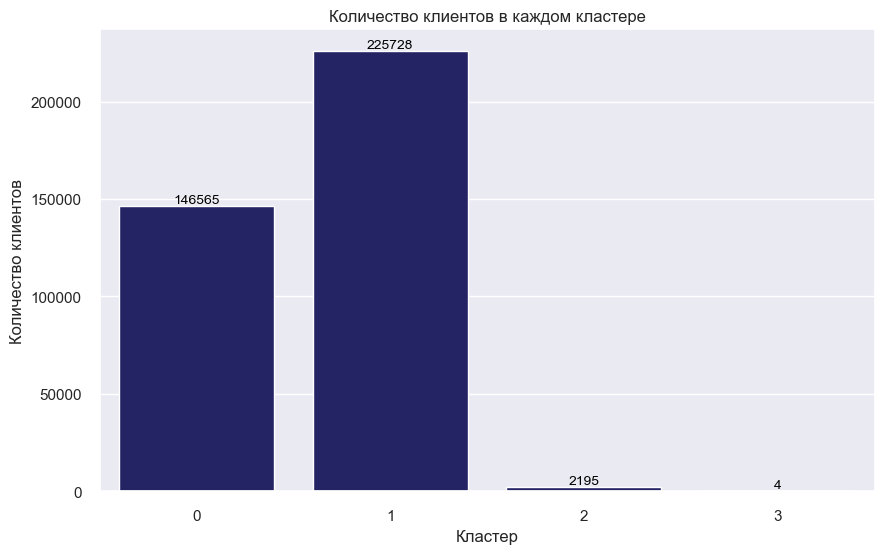

In [114]:
# Подсчет количества клиентов в каждом кластере
cluster_counts = customer_df3['Кластер'].value_counts().sort_index()

# Визуализация с заданным цветом и подписями
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, color='midnightblue')  # Задаем цвет

# Добавление подписей значений на столбцы
for bar in bars.patches:
    height = bar.get_height()  # Высота столбца (количество клиентов)
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Позиция по X (центр столбца)
        height,  # Позиция по Y (верх столбца)
        f'{int(height)}',  # Текст (количество клиентов)
        ha='center',  # Горизонтальное выравнивание (по центру)
        va='bottom',  # Вертикальное выравнивание (низ)
        fontsize=10,  # Размер шрифта
        color='black'  # Цвет текста
    )

plt.title('Количество клиентов в каждом кластере')
plt.xlabel('Кластер')
plt.ylabel('Количество клиентов')
plt.show()

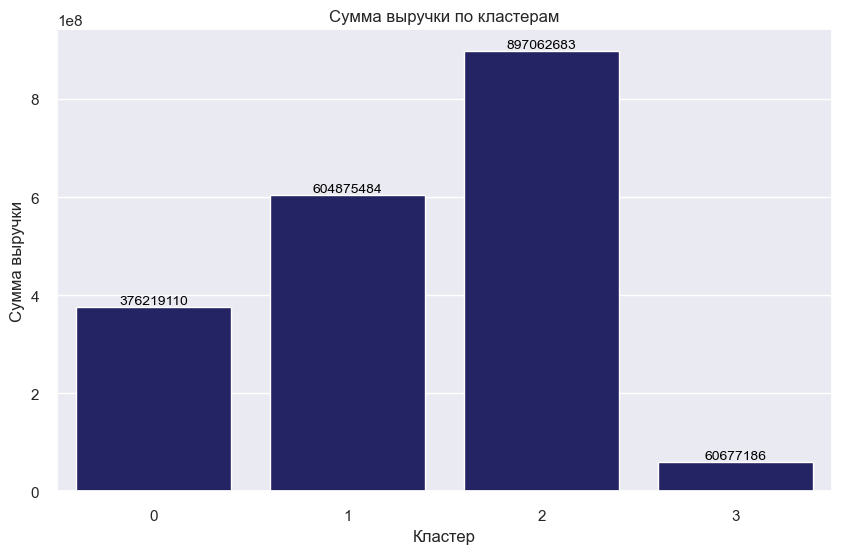

In [115]:
# Группировка по кластерам и расчет суммы выручки
revenue_by_cluster = customer_df3.groupby('Кластер')['Сумма заказов (руб.)'].sum()

# Визуализация с заданным цветом и подписями
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=revenue_by_cluster.index, y=revenue_by_cluster.values, color='midnightblue') 

# Добавление подписей значений на столбцы
for bar in bars.patches:
    height = bar.get_height()  
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,  
        f'{int(height)}', 
        ha='center', 
        va='bottom', 
        fontsize=10,  
        color='black' 
    )

plt.title('Сумма выручки по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Сумма выручки')
plt.show()

In [116]:
# Группировка по кластерам и расчет количества клиентов
cluster_counts = customer_df3['Кластер'].value_counts().sort_index()

# Расчет процентного соотношения клиентов
total_clients = cluster_counts.sum()
client_percentage = (cluster_counts / total_clients) * 100

# Группировка по кластерам и расчет суммы выручки
revenue_by_cluster = customer_df3.groupby('Кластер')['Сумма заказов (руб.)'].sum()

# Расчет процентного соотношения выручки
total_revenue = revenue_by_cluster.sum()
revenue_percentage = (revenue_by_cluster / total_revenue) * 100

# Создание таблицы
percentage_table = pd.DataFrame({
    'Кластер': client_percentage.index,
    'Процент клиентов (%)': client_percentage.values.round(2),  # Округляем до 2 знаков
    'Процент выручки (%)': revenue_percentage.values.round(2)   # Округляем до 2 знаков
})

# Вывод таблицы
print(percentage_table)

   Кластер  Процент клиентов (%)  Процент выручки (%)
0        0                 39.14                19.40
1        1                 60.28                31.20
2        2                  0.59                46.27
3        3                  0.00                 3.13


In [125]:
import math

def cluster_analysis_with_boxplot_grid(df3, columns, cluster_col='Кластер', ncols=2, figsize=(20, 35)):
    """
    Функция для визуализации распределения метрик по кластерам в виде плитки из боксплотов
    
    Параметры:
    - df3: DataFrame с данными
    - columns: список колонок для анализа
    - cluster_col: колонка с кластерами (по умолчанию 'Кластер')
    - ncols: количество колонок в плитке (по умолчанию 2)
    - figsize: размер всей фигуры (по умолчанию (15, 10))
    """
    
    # Рассчитываем количество строк
    n_plots = len(columns)
    nrows = math.ceil(n_plots / ncols)
    
    # Создаем фигуру с субплогами
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Преобразуем в плоский массив для удобства
    
    # Строим график для каждой колонки
    for i, column in enumerate(columns):
        ax = axes[i]
        
        # Создаем боксплот
        sns.boxplot(data=df3, x=cluster_col, y=column, showfliers=False, 
                   color='midnightblue', ax=ax)
        
        # Добавляем заголовки и подписи
        ax.set_title(f"Распределение {column} по кластерам", fontsize=18)
        ax.set_xlabel(cluster_col, fontsize=16)
        ax.set_ylabel(column, fontsize=16)
        
        # Добавляем аннотации медианных значений
        for cluster in sorted(df3[cluster_col].unique()):
            median = df3[df3[cluster_col] == cluster][column].median()
            ax.text(
                x=cluster,
                y=median,
                s=f"{median:.2f}",
                color="black",
                ha="center",
                va="center",
                fontsize=16,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
            )
        
        # Добавляем сетку
        ax.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Скрываем пустые субплоги, если они есть
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    # Оптимизируем расположение элементов
    plt.tight_layout()
    plt.show()

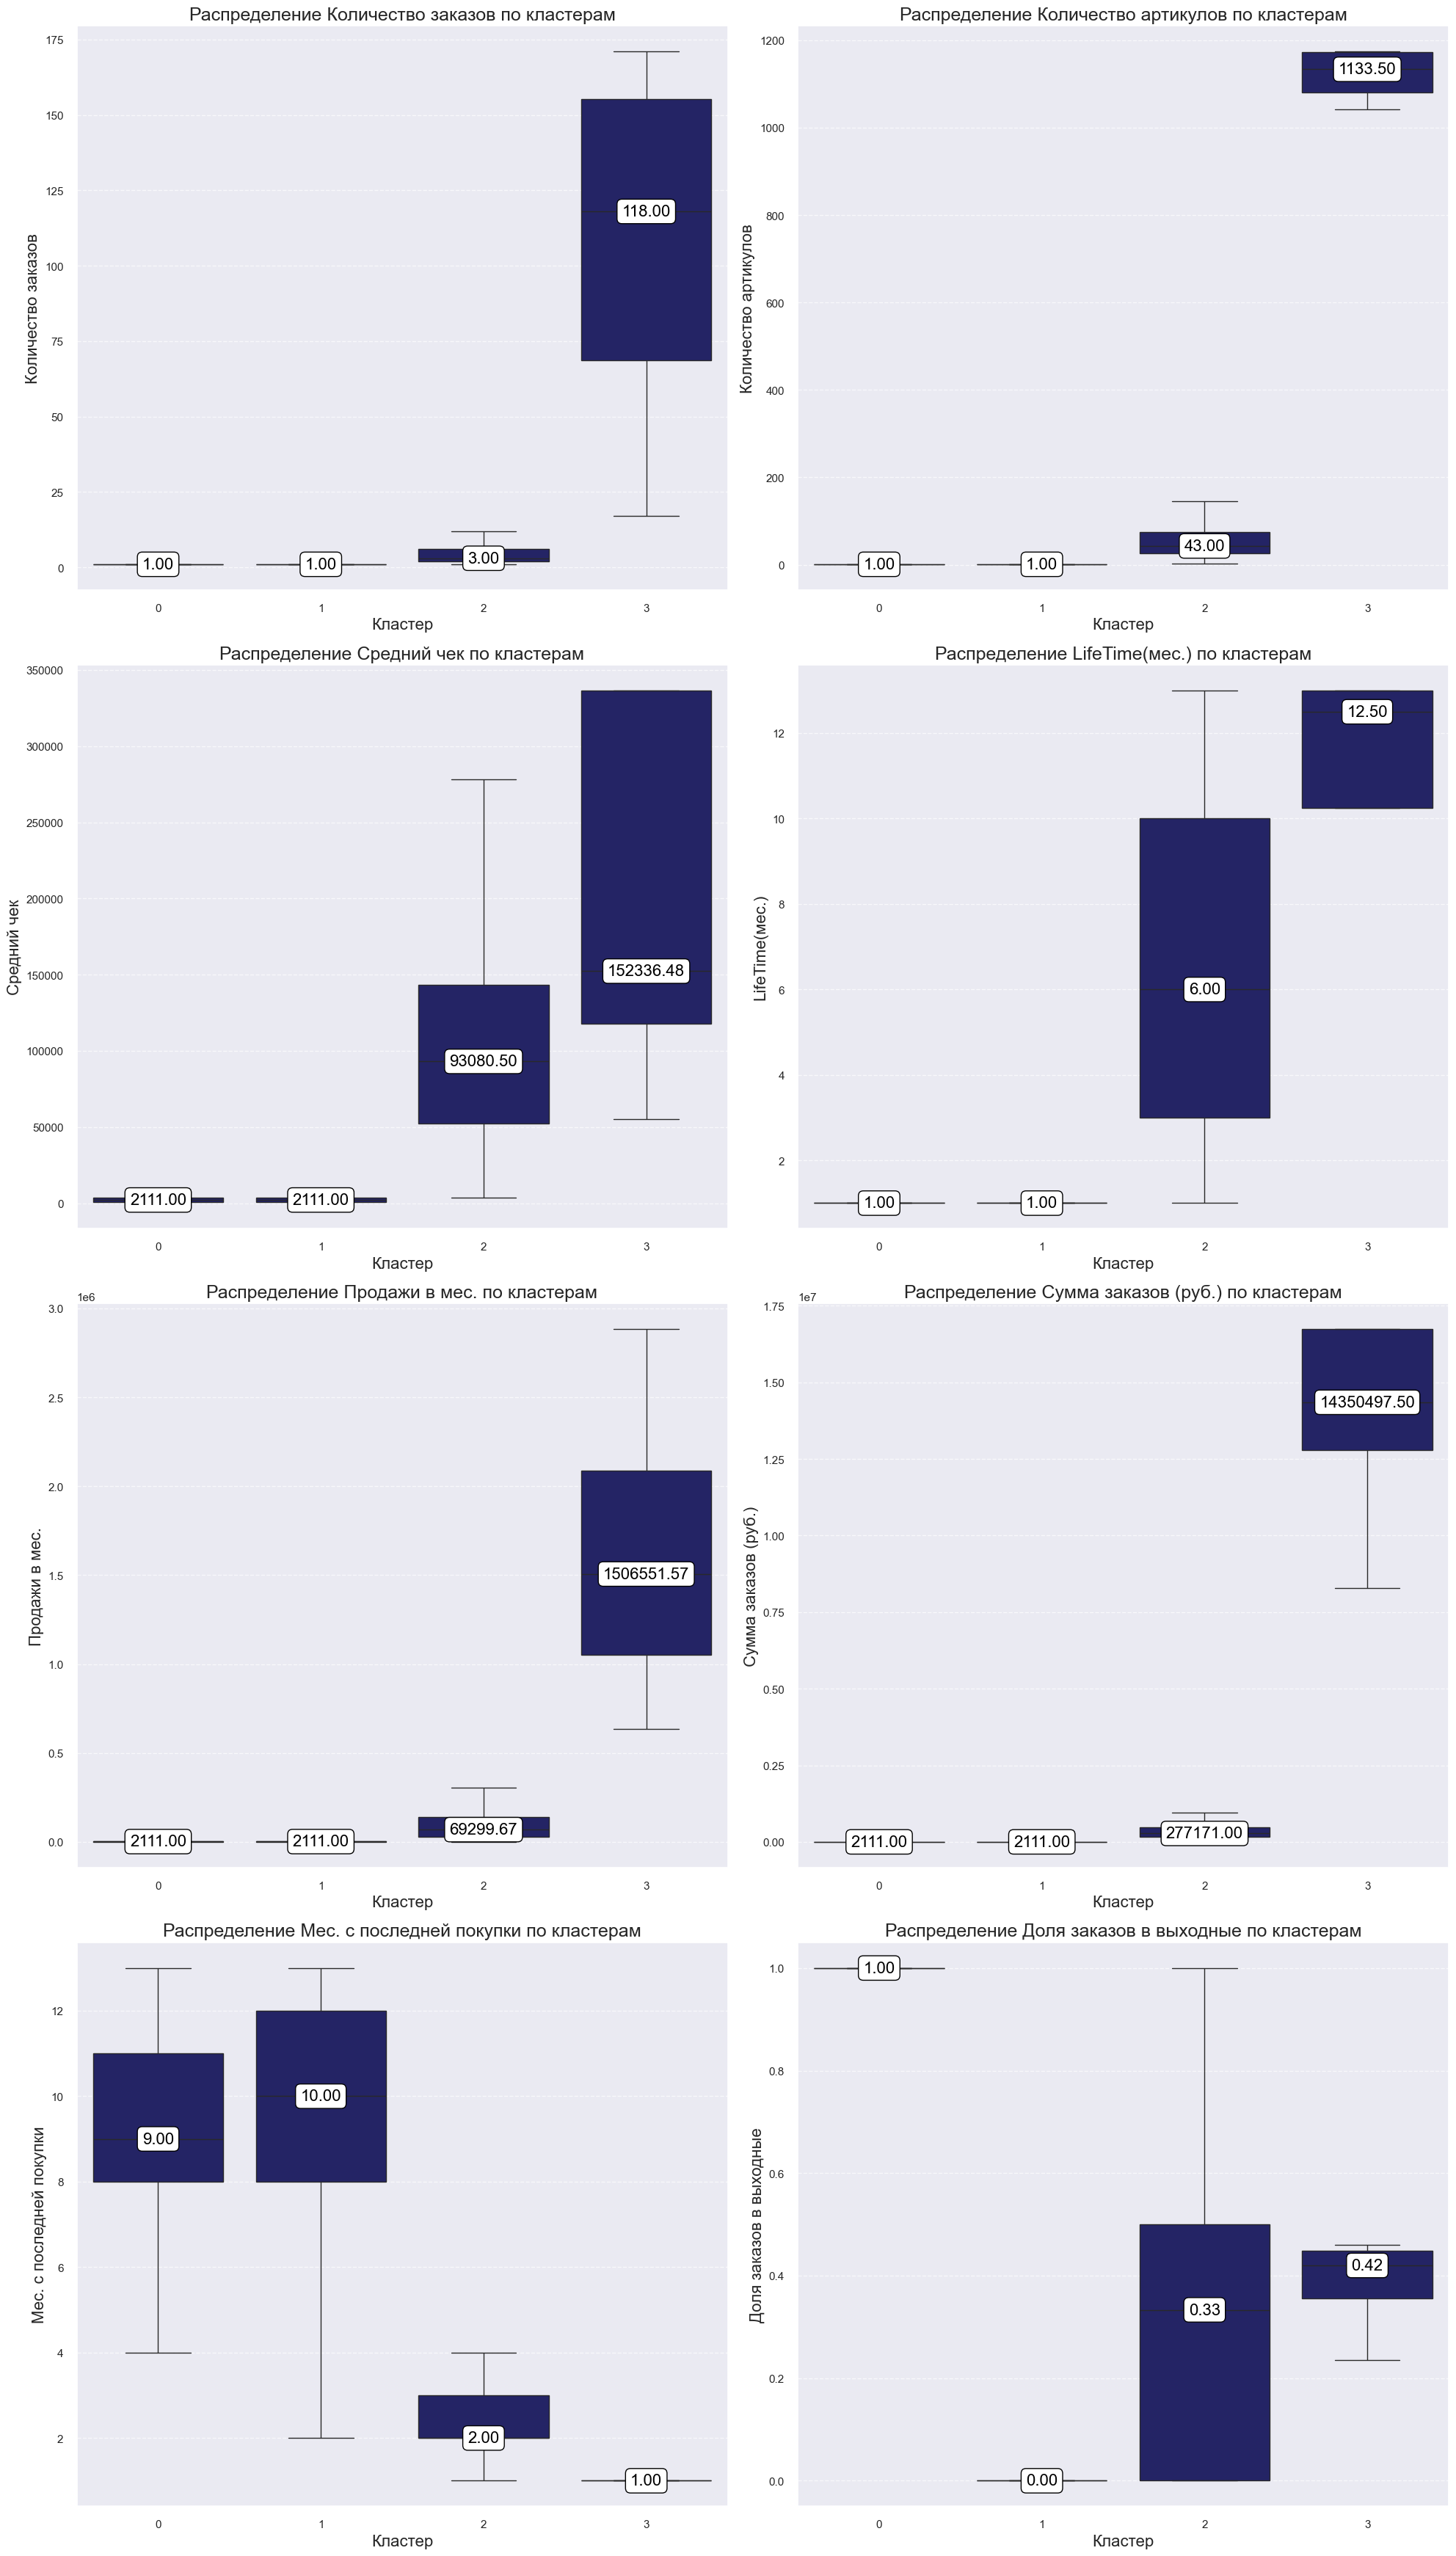

In [126]:
# Вызов функции для каждой колонки по отдельности
columns_to_plot = customer_df3.drop(columns=['ID клиента','Кластер']).columns.tolist()
cluster_analysis_with_boxplot_grid(customer_df3, columns=columns_to_plot, cluster_col='Кластер')

In [127]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603894 entries, 0 to 603893
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID заказа             603894 non-null  object        
 1   Артикул               603894 non-null  object        
 2   Название              603894 non-null  object        
 3   Количество            603894 non-null  int64         
 4   Дата                  603894 non-null  datetime64[ns]
 5   Цена                  603894 non-null  int64         
 6   ID клиента            603894 non-null  float64       
 7   Регион                603894 non-null  object        
 8   Сумма заказов (руб.)  603894 non-null  int64         
 9   День недели           603894 non-null  int32         
 10  Выходной              603894 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(3), object(4)
memory usage: 44.3+ MB


## Описание кластеров

### Кластер 0


Разовые покупатели. 39.14% клиентов относится к этому кластеру, вклад в выручку 19.40%. Это клиенты, которые совершают всего один заказ с небольшим средним чеком (2111 руб). Их Life Time составляет 1 месяц - это минимальное значение, по факту это разовая покупка. Давность покупки от 4 до 13 месяцев, медиана 9 месяцев. Совершают покупки только в выходные дни.

Это наиболее массовый, но наименее лояльный сегмент. Клиенты делают одну покупку и не возвращаются. Требуется работа по повышению удержания.


### Кластер 1

Этот кластер копирует характеристики класса 0, за исключением того, что все заказы сделаны в выходные дни.

60.28% клиентской базы, 31.20% от выручки. 

В дальнейшей работе необходимо объединить с кластером 0.

### Кластер 2

Клиенты с высокой покупательной способностью, активные и малочисленные.
Хотя этот сегмент крайне мал (0.59% клиентской базы), приносит 46.27% всей выручки. Клиенты совершают в среднем по 3 покупки, но с очень высоким средним чеком (93 080 руб) и большим количеством артикулов (43). Их Life Time 1-13 месяцев, медиана — 6 месяцев, а время с последней покупки составляет от 1 до 7 месяцев (медиана — 2 месяца). Заказы чаще совершаются в будние дни.

Это лояльные клиенты с высокой ценностью. Их необходимо удерживать, например с помощью программ лояльности и персональных предложений.

### Кластер 3

Максимально лояльные и высокодоходные клиенты. По всем признакам b2b сегмент.
Кластер крайне мал (>0.1%) и приносит 3.13% всей выручки. В среднем клиенты совершают большое количество заказов (118) с высоким средним чеком (152 336 руб). Также у них самый высокий Life Time (от 10 до 13 месяцев, медиана — 12,5 месяца). Их интересует большое количество разнообразных товаров (в среднем 1133 артикулов). Время с последней покупки — всего 1 месяц. Около половины заказов совершаются в будние дни.

Это наиболее ценный сегмент с высокой частотой заказов и большим вкладом в выручку на 1 покупателя. Их необходимо поддерживать индивидуальным подходом, например, персональными менеджерами, специальной ценовой программой, эксклюзивными предложениями и др. Однако этот сегмент очень мал. Возможно из-за заточенности бизнеса на работу с b2c, а не b2b.

### Общий вывод:
Кластер 0 и 1 – массовые, разовые клиенты с низкой вовлеченностью. Нужно работать над их удержанием.

Кластер 2 – перспективные лояльные клиенты с высоким средним чеком. Нужно поощрять повторные заказы.

Кластер 3 – элитные клиенты с высокой частотой заказов. Необходимо персонализированное обслуживание.

# Дизайн А/Б теста

Как видно из результатов сравнения кластеров, у компании значительная доля клиентов совершает только одну покупку и больше не возвращается (кластеры 0 и 1). Если удастся вернуть часть таких клиентов, это может существенно увеличить выручку. Чтобы их поведение стало больше похоже на поведение клиентов из кластера 2.

## Гипотеза


Если предложить клиентам из кластера "0" скидку 10% на второй заказ, то в течение 2-х недель доля повторных покупок среди них увеличится на 8%, так как это привлечет их внимание и скидка снизит барьер для повторной покупки.

## План.

### 1. Определение размера выборки
Расчет по формуле $$ n = \frac{(Z_{\alpha/2} \cdot \sqrt{2p(1 - p)} + Z_{\beta} \cdot \sqrt{p_1(1 - p_1) + p_2(1 - p_2)})^2}{(p_2 - p_1)^2} $$


Где:  
- $n$ — минимальный размер выборки на одну группу (контрольную или тестовую).  
- $p_1$ — текущая конверсия (1.3%).  
- $p_2$ — ожидаемая конверсия после изменения (15%).  
- $p = \frac{p_1 + p_2}{2}$ — средняя конверсия.  
- $Z_{\alpha/2}$ — критическое значение нормального распределения для уровня значимости $\alpha$ (1.96 для 5%).  
- $Z_{\beta}$ — критическое значение нормального распределения для статистической мощности $1 - \beta$ (обычно 0.84 для 80% мощности).

При:
- уровень значимости $\alpha$ - 5%  
- Статистическая мощность (1-$\beta$) — 80% 
- Размер выборки = **124**

Для повышение точности увиличем размер выборки до **20000**, т.к. затраты на эксперимент минимальны.

### 2. Разделение на группы
- **Группа A (контрольная группа):** Клиенты, которые не получат никакого специального предложения.
- **Группа B (тестовая группа):** Клиенты, которые получат предложение скидки 10% на второй заказ в течение 2-х недель.

Распределение по группам случайным образом пополам. Но после необходимо проверить группы на однородность по среднему чеку и давности покупки с помощью t-теста или тест Манна-Уитни. 

### 3. Формат предложения
- Отправляем клиентам из группы B персонализированное предложение по e-mail с предложением скидки 10% на второй заказ c ограничением по времени в 2 недели.

### 4. Метрики для оценки
- **Первичная метрика:** Доля клиентов, совершивших повторную покупку.
- **Вторичные метрики:**
  - Средний чек повторных покупок.
  - Общая выручка от повторных покупок.
  - Время между первой и второй покупкой.

### 5. Продолжительность эксперимента
- Эксперимент длиться 2 недели.

### 6. Анализ результатов
- Если разница в доле повторных покупок между группами составит 15% или более, гипотеза подтверждается. Если нет — гипотеза опровергается.
- Проверим статистическую значимость различий с помощью статистических тестов. Подойдет z-тест для пропорций, т.к. данные бинарны (купил/не купил).
- Если ∣Z∣ > 1.96, различия статистически значимы на уровне α = 0.05


# Вывод

Компания имеет хороший потенциал для развития продаж за счет дифференцированного подхода к клиентам.

В ходе разделения клиентской базы на кластеры была выявлена одна из проблем: 99% клиентов совершают всего одну покупку и не возвращаются (низкий Retention). Несмотря на их огромную численность, они формируют лишь 51% выручки.

Спланированный А/Б тест – лишь первый шаг к глубокой персонализации работы с клиентами.

В дальнейшем можно: 
 - провести серию CustDev для большего понимания потребностей сегментов
 - провести анализ потребительских корзин для системы рекомендаций покупок
 - улучшить показатели рекламы и многое другое.  